# Math Student Grade Prediction

***Bartlomiej Lesniowski***

***07.12.2024***

## Introduction

Description from Kaggle.com - https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/data

"The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade."

## Goal

My goal is to create the prediction model, that will predict if student pass the exam or fail. 

In this project I will convert all categorical features into numbers.

## Description

<h4>school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
<h4>sex - student's sex (binary: 'F' - female or 'M' - male)
<h4>age - student's age (numeric: from 15 to 22)
<h4>address - student's home address type (binary: 'U' - urban or 'R' - rural)
<h4>famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
<h4>Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
<h4>Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 = 5th to 9th grade, 3 = secondary education or 4 = higher education)
<h4>Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 = 5th to 9th grade, 3 = secondary education or 4 = higher education)
<h4>Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<h4>Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<h4>reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
<h4>guardian - student's guardian (nominal: 'mother', 'father' or 'other')
<h4>traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
<h4>studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
<h4>failures - number of past class failures (numeric: n if 1<=n<3, else 4)
<h4>schoolsup - extra educational support (binary: yes or no)
<h4>famsup - family educational support (binary: yes or no)
<h4>paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
<h4>activities - extra-curricular activities (binary: yes or no)
<h4>nursery - attended nursery school (binary: yes or no)
<h4>higher - wants to take higher education (binary: yes or no)
<h4>internet - Internet access at home (binary: yes or no)
<h4>romantic - with a romantic relationship (binary: yes or no)
<h4>famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
<h4>freetime - free time after school (numeric: from 1 - very low to 5 - very high)
<h4>goout - going out with friends (numeric: from 1 - very low to 5 - very high)
<h4>Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
<h4>Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
<h4>health - current health status (numeric: from 1 - very bad to 5 - very good)
<h4>absences - number of school absences (numeric: from 0 to 93)
<h4>G1 - first period grade (numeric: from 0 to 20)
<h4>G2 - second period grade (numeric: from 0 to 20)
<h4>G3 - final grade (numeric: from 0 to 20, output target)

<h1> 1. Import necessary data

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
studentMat = pd.read_csv('student-mat.csv')

In [3]:
studentMat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
studentMat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
studentMat.shape

(395, 33)

There are 33 features, 395 rows and no nulls

<h1> 3. Clearing dataset

Check unique values for all features

In [6]:
for c in studentMat.columns:
    print ("---- %s ---" % c)
    print (studentMat[c].value_counts().head(10))

---- school ---
school
GP    349
MS     46
Name: count, dtype: int64
---- sex ---
sex
F    208
M    187
Name: count, dtype: int64
---- age ---
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64
---- address ---
address
U    307
R     88
Name: count, dtype: int64
---- famsize ---
famsize
GT3    281
LE3    114
Name: count, dtype: int64
---- Pstatus ---
Pstatus
T    354
A     41
Name: count, dtype: int64
---- Medu ---
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64
---- Fedu ---
Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64
---- Mjob ---
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
---- Fjob ---
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64
---- reason ---
reason
course        145
home          109
reputation    105
other          36
Name: count

There is no need to clear the dataset

In [7]:
studentMat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

<h1> 4. Converting the data

<h3> Convert features with 2 values to numbers

In [8]:
studentMat['school'].replace(to_replace=['GP', 'MS'], value=[1, 0], inplace=True)
studentMat['sex'].replace(to_replace=['F', 'M'], value=[1, 0], inplace=True)
studentMat['address'].replace(to_replace=['U', 'R'], value=[1, 0], inplace=True)
studentMat['famsize'].replace(to_replace=['GT3', 'LE3'], value=[1, 0], inplace=True)
studentMat['Pstatus'].replace(to_replace=['T', 'A'], value=[1, 0], inplace=True)

In [9]:
convCol = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for c in studentMat.columns:
    if c in convCol:  
        studentMat[c].replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)


In [10]:
for c in studentMat.columns:
    print ("---- %s ---" % c)
    print (studentMat[c].value_counts().head(10))

---- school ---
school
1    349
0     46
Name: count, dtype: int64
---- sex ---
sex
1    208
0    187
Name: count, dtype: int64
---- age ---
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64
---- address ---
address
1    307
0     88
Name: count, dtype: int64
---- famsize ---
famsize
1    281
0    114
Name: count, dtype: int64
---- Pstatus ---
Pstatus
1    354
0     41
Name: count, dtype: int64
---- Medu ---
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64
---- Fedu ---
Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64
---- Mjob ---
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
---- Fjob ---
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64
---- reason ---
reason
course        145
home          109
reputation    105
other          36
Name: count, dtyp

<h3> Convert all columns with more than 2 text values to numbers

Converting 'Mjob' and 'Fjob' to numbers
- other -0
- services -1
- at_home - 2
- teacher - 3
- health - 4

In [11]:
studentMat['Mjob'].replace(to_replace=['other', 'services', 'at_home', 'teacher', 'health'], value=[0, 1, 2, 3, 4], inplace=True)
studentMat['Fjob'].replace(to_replace=['other', 'services', 'at_home', 'teacher', 'health'], value=[0, 1, 2, 3, 4], inplace=True)

In [12]:
studentMat['Mjob'].unique()

array([2, 4, 0, 1, 3], dtype=int64)

In [13]:
studentMat['Fjob'].unique()

array([3, 0, 1, 4, 2], dtype=int64)

Change 'reason' values to 0, 1, 2, 3 

In [14]:
studentMat['reason'].replace(to_replace=['course', 'home','reputation','other'], value=[0, 1, 2, 3], inplace = True)

In [15]:
studentMat['reason'].unique()

array([0, 3, 1, 2], dtype=int64)

Change 'guardian' to numbers
- mother - 0
- father - 1
- other - 2

In [16]:
studentMat['guardian'].replace(to_replace=['mother', 'father', 'other'], value=[0, 1, 2], inplace = True)

In [17]:
studentMat['guardian'].unique()

array([0, 1, 2], dtype=int64)

In [18]:
studentMat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

All features in the dataset are numbers

<h1> 5. Statistics

Correlation check. I decided to use the Pearson method

In [19]:
cor = studentMat.corr(method = 'pearson')
cor['G3'].sort_values(ascending = False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
higher        0.182465
Fedu          0.152457
reason        0.120454
Mjob          0.108555
address       0.105756
paid          0.101996
internet      0.098483
studytime     0.097820
Fjob          0.097343
nursery       0.051568
famrel        0.051363
school        0.045017
absences      0.034247
activities    0.016100
freetime      0.011307
famsup       -0.039157
Walc         -0.051939
guardian     -0.054193
Dalc         -0.054660
Pstatus      -0.058009
health       -0.061335
famsize      -0.081407
schoolsup    -0.082788
sex          -0.103456
traveltime   -0.117142
romantic     -0.129970
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

Since there is no information on when the student passed, I decided that only those who obtained an equal or greater number of points than 11 would pass

Create the new feature 'finalG, based on final grade - 'G3'

In [20]:
studentMat['finalG'] = studentMat['G3'].where(studentMat['G3']>=11, 1)
studentMat['finalG'] = studentMat['finalG'].where(studentMat['finalG']<11, 0)
studentMat['finalG'].value_counts()

finalG
0    209
1    186
Name: count, dtype: int64

<Axes: xlabel='finalG', ylabel='count'>

<Figure size 640x480 with 0 Axes>

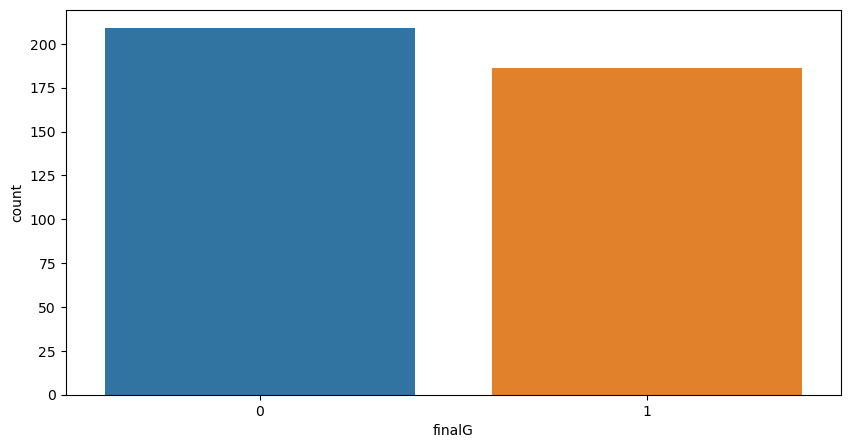

In [21]:
plt.tight_layout()
plt.figure(figsize=(10,5))
sns.countplot(x = studentMat['finalG'])

Correlation check once again

In [22]:
cor = studentMat.corr(method = 'pearson')
cor['finalG'].sort_values(ascending = False)

finalG        1.000000
failures      0.326716
goout         0.153963
age           0.153245
schoolsup     0.135898
traveltime    0.135808
Walc          0.129524
sex           0.071673
Dalc          0.071446
absences      0.056571
Pstatus       0.054982
guardian      0.052001
famsize       0.041203
famsup        0.031709
nursery       0.026905
famrel        0.013363
health        0.010505
romantic      0.009065
freetime      0.001055
activities   -0.006575
Mjob         -0.030829
paid         -0.043063
reason       -0.061490
Fjob         -0.072252
school       -0.084422
internet     -0.094102
studytime    -0.100402
address      -0.104360
higher       -0.152270
Medu         -0.164134
Fedu         -0.172681
G3           -0.750675
G1           -0.754358
G2           -0.757111
Name: finalG, dtype: float64

 As there is no need to keep the 'G3' feature I will drop it

In [23]:
studentMat = studentMat.drop(['G3'], axis = 1)

In [24]:
studentMat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

Using the T-student test to select statistically significant features

In [65]:
from scipy import stats

importance = []
 
for x in studentMat[1:]:
    pvalue = stats.ttest_ind(studentMat.loc[studentMat.finalG==1][x], studentMat.loc[studentMat.finalG==0][x])[1]
    if pvalue<0.05:
        importance.append(x)
        print(f'The variable {x} is statistically significant with a pvalue = {pvalue:.2}')
        
print('\n The sum of all statistically significant features including the target feature: ', len(importance))

The variable age is statistically significant with a pvalue = 0.0023
The variable address is statistically significant with a pvalue = 0.038
The variable Medu is statistically significant with a pvalue = 0.0011
The variable Fedu is statistically significant with a pvalue = 0.00057
The variable traveltime is statistically significant with a pvalue = 0.0069
The variable studytime is statistically significant with a pvalue = 0.046
The variable failures is statistically significant with a pvalue = 2.8e-11
The variable schoolsup is statistically significant with a pvalue = 0.0068
The variable higher is statistically significant with a pvalue = 0.0024
The variable goout is statistically significant with a pvalue = 0.0022
The variable Walc is statistically significant with a pvalue = 0.01
The variable G1 is statistically significant with a pvalue = 7.8e-74
The variable G2 is statistically significant with a pvalue = 1.1e-74
The variable finalG is statistically significant with a pvalue = 0.0


In [26]:
students = studentMat[importance]

In [27]:
students.sample(5)

,age,address,Medu,Fedu,traveltime,studytime,failures,schoolsup,higher,goout,Walc,G1,G2,finalG
34,16,1,3,2,1,1,0,0,1,3,1,12,14,0
195,17,1,2,4,1,2,0,0,1,2,1,14,15,0
255,17,1,1,1,2,1,1,0,1,4,2,7,9,1
385,18,0,2,2,2,3,0,0,1,3,3,10,9,1
252,18,1,2,1,1,1,1,0,0,5,5,6,9,1


Correlation check for selected features

In [28]:
corr = students.corr(method = 'pearson')
corr['finalG'].sort_values(ascending=False)

finalG        1.000000
failures      0.326716
goout         0.153963
age           0.153245
schoolsup     0.135898
traveltime    0.135808
Walc          0.129524
studytime    -0.100402
address      -0.104360
higher       -0.152270
Medu         -0.164134
Fedu         -0.172681
G1           -0.754358
G2           -0.757111
Name: finalG, dtype: float64

Creating a heatmap

<Axes: >

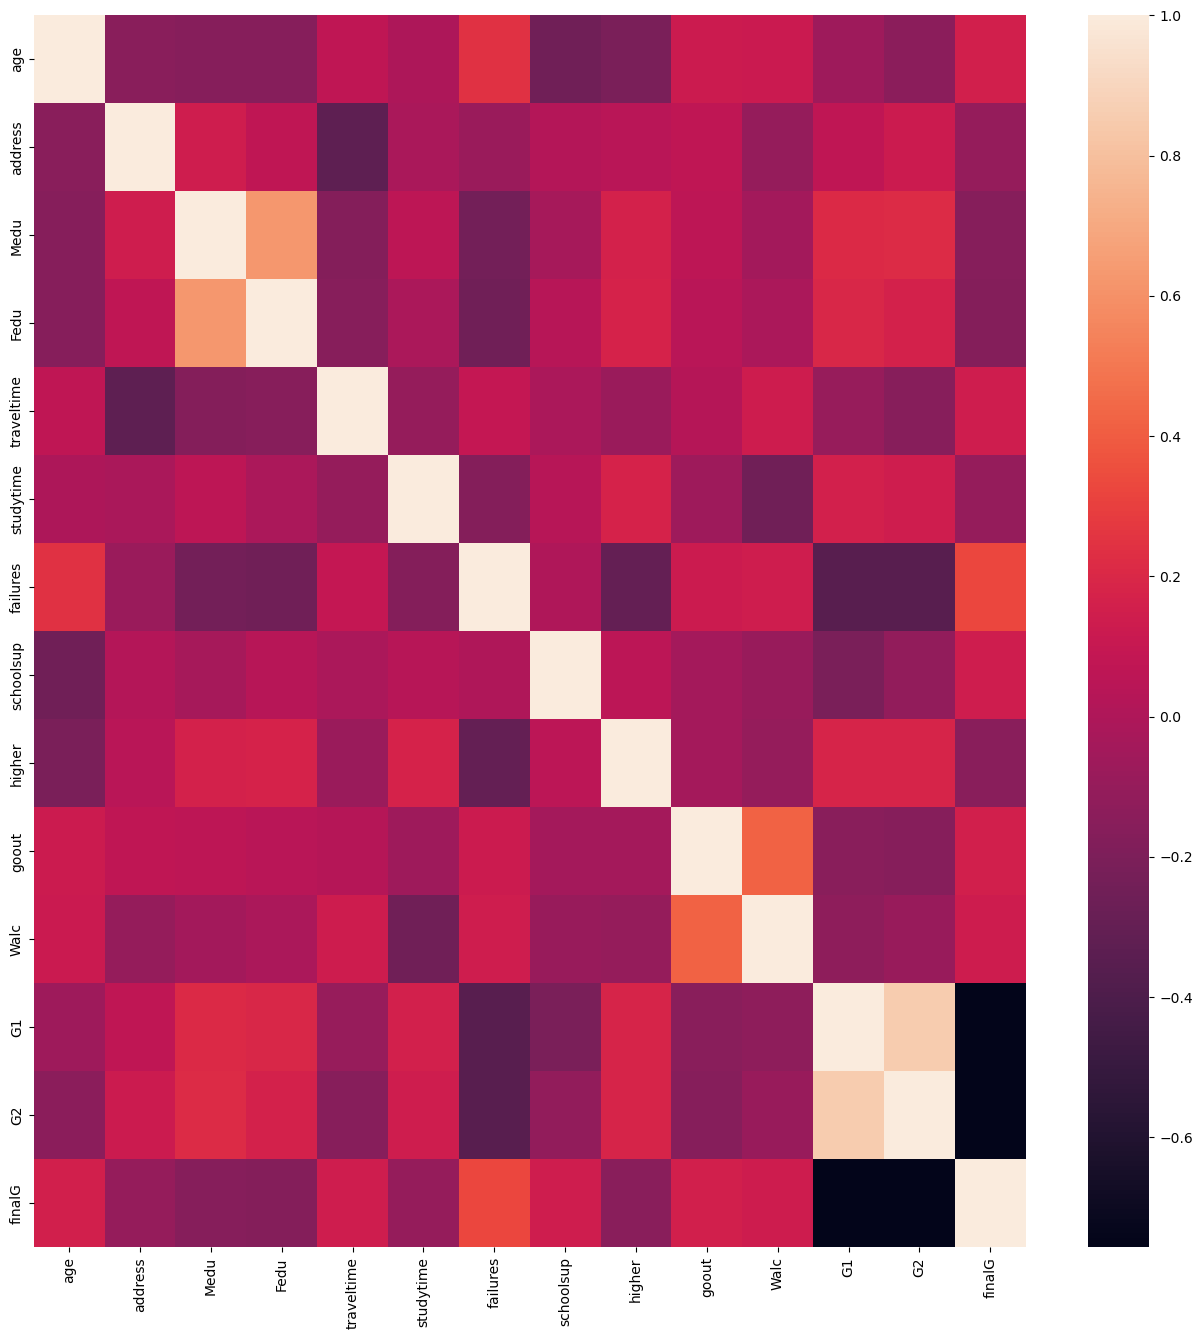

In [29]:
plt.figure(figsize=(16,16))
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

<h1> 6. Model training

<h3>I will check couple of models:</h3>
<h5>LogisticRegression
<h5>LogisticRegression with crossvalidation
<h5>Decision Tree Classifier
<h5>Random Forest Classifier
<h5>SVM (SVC)
<h5>KNeighbors
<h5>AdaBoost

I will measure the model's effectiveness using the AUROC score

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import gc
import warnings
warnings.filterwarnings("ignore")

In [31]:
X = students.drop(['finalG'], axis = 1)
y = students['finalG']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2137)

## Defining functions

In [33]:
def plot_ROCcurve():
    fpr, tpr, thresholds = roc_curve(y_test, prediction)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--' )
    plt.hlines(y=0.80, xmax=1, xmin=0, colors="g", linestyles="--")
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for predicting the' + current_model)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    auc = roc_auc_score(y_test, prediction)
    print('ROC AUC : {:.4f}'.format(auc))
    plt.show()

In [34]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Model check

### Logistic Regression

In [35]:
current_model = 'Logistic Regression'
model = LogisticRegression(max_iter = 500)
model.fit(X_train, y_train)
pred = model.predict(X_test)
prediction = model.predict_proba(X_test)[:, 1]
auc = lr_auc = roc_auc_score(y_test, prediction)
print('ROC AUC : {:.4f}'.format(auc))
print(classification_report(y_test,pred))

ROC AUC : 0.9519
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        35
           1       0.90      0.98      0.93        44

    accuracy                           0.92        79
   macro avg       0.93      0.92      0.92        79
weighted avg       0.93      0.92      0.92        79



ROC AUC : 0.9519


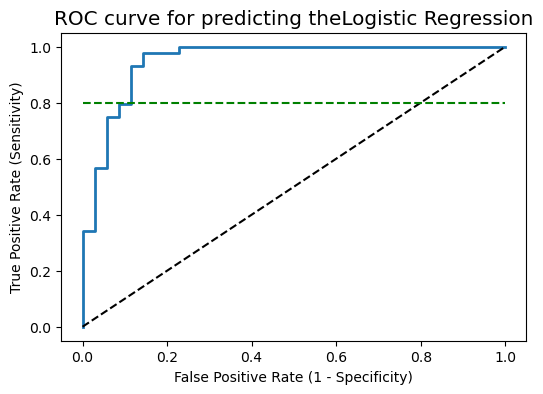

In [36]:
plot_ROCcurve()

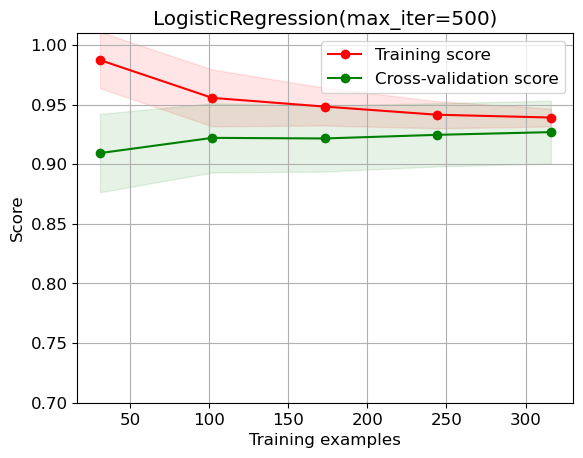

In [37]:
plot_learning_curve(model, model, X, y, (0.7, 1.01), cv=cv, n_jobs=4),
plt.show()

In [38]:
print('ROC AUC : {:.4f}'.format(auc))

ROC AUC : 0.9519


### Logistic Regression with crossvalidation

In [39]:
model = LogisticRegressionCV(max_iter = 500, cv = 2, solver = 'newton-cg')
model.fit(X_train, y_train)
pred = model.predict(X_test)
prediction = model.predict_proba(X_test)[:, 1]
auc = lrCV_auc = roc_auc_score(y_test, prediction)
print('ROC AUC : {:.4f}'.format(auc))
print(classification_report(y_test,pred))

ROC AUC : 0.9539
              precision    recall  f1-score   support

           0       0.97      0.83      0.89        35
           1       0.88      0.98      0.92        44

    accuracy                           0.91        79
   macro avg       0.92      0.90      0.91        79
weighted avg       0.92      0.91      0.91        79



ROC AUC : 0.9539


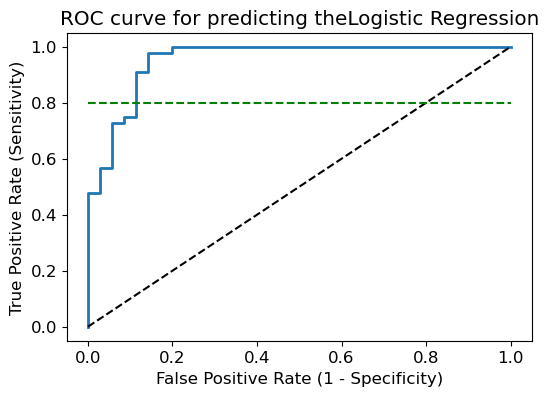

In [40]:
plot_ROCcurve()

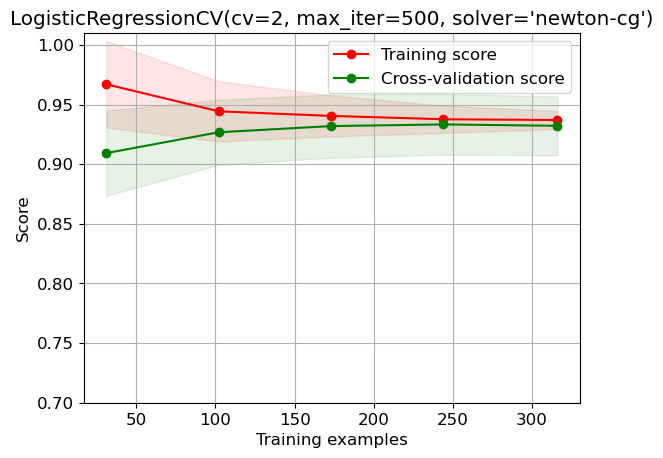

In [41]:
plot_learning_curve(model, model, X, y, (0.7, 1.01), cv=cv, n_jobs=4),
plt.show()

In [42]:
print('ROC AUC : {:.4f}'.format(auc))

ROC AUC : 0.9539


### Decision Tree Classifier

In [43]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
auc = dt_auc = roc_auc_score(y_test, prediction)
print('ROC AUC : {:.4f}'.format(dt_auc))
print(classification_report(y_test,prediction))


ROC AUC : 0.9088
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.91      0.93      0.92        44

    accuracy                           0.91        79
   macro avg       0.91      0.91      0.91        79
weighted avg       0.91      0.91      0.91        79



[Text(0.4625, 0.9583333333333334, 'x[12] <= 10.5\ngini = 0.495\nsamples = 316\nvalue = [174, 142]'),
 Text(0.2, 0.875, 'x[12] <= 9.5\ngini = 0.141\nsamples = 144\nvalue = [11, 133]'),
 Text(0.15, 0.7916666666666666, 'gini = 0.0\nsamples = 110\nvalue = [0, 110]'),
 Text(0.25, 0.7916666666666666, 'x[10] <= 2.5\ngini = 0.438\nsamples = 34\nvalue = [11, 23]'),
 Text(0.2, 0.7083333333333334, 'x[11] <= 11.5\ngini = 0.499\nsamples = 23\nvalue = [11, 12]'),
 Text(0.15, 0.625, 'x[2] <= 1.5\ngini = 0.465\nsamples = 19\nvalue = [7, 12]'),
 Text(0.1, 0.5416666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.2, 0.5416666666666666, 'x[0] <= 15.5\ngini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(0.1, 0.4583333333333333, 'x[3] <= 2.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.05, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3, 0.4583333333333333, 'x[5] <= 3.5\ngini = 0.397\nsamples = 11\nvalue = [3,

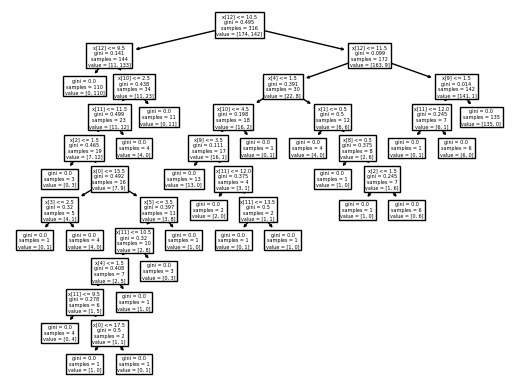

In [44]:
tree.plot_tree(model)

ROC AUC : 0.9088


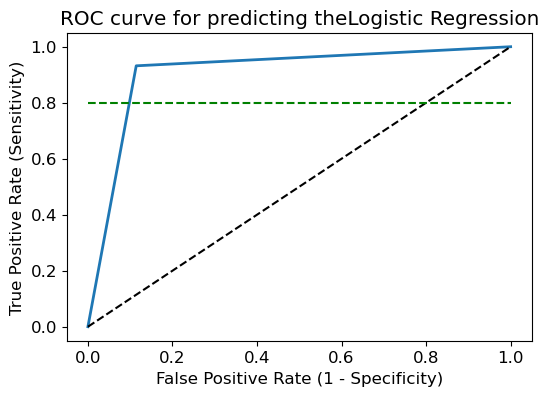

In [45]:
plot_ROCcurve()

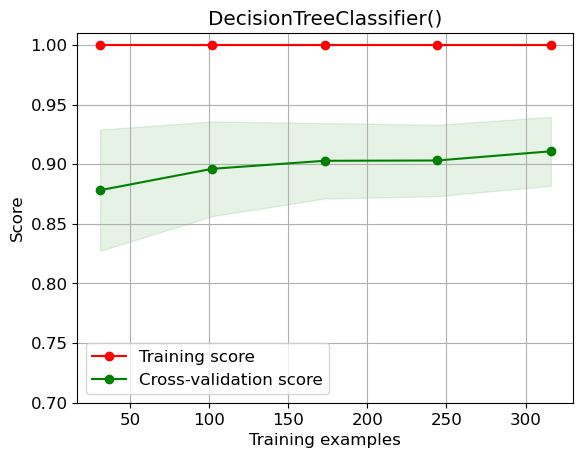

In [46]:
plot_learning_curve(model, model, X, y, (0.7, 1.01), cv=cv, n_jobs=4),
plt.show()

In [47]:
print('ROC AUC : {:.4f}'.format(auc))

ROC AUC : 0.9088


### Random Forest Classifier

In [48]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
auc = rf_auc = roc_auc_score(y_test, prediction)
print('ROC AUC : {:.4f}'.format(auc))
print(classification_report(y_test,prediction))

ROC AUC : 0.8974
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        35
           1       0.91      0.91      0.91        44

    accuracy                           0.90        79
   macro avg       0.90      0.90      0.90        79
weighted avg       0.90      0.90      0.90        79



ROC AUC : 0.8974


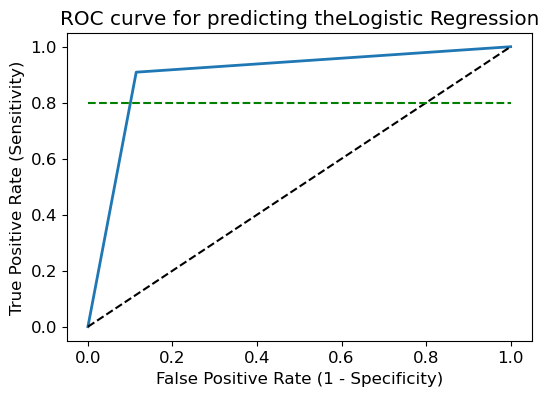

In [49]:
plot_ROCcurve()

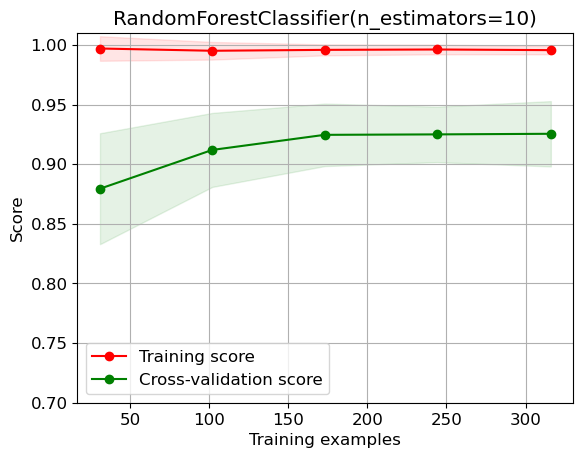

In [50]:
plot_learning_curve(model, model, X, y, (0.7, 1.01), cv=cv, n_jobs=4),
plt.show()

In [51]:
print('ROC AUC : {:.4f}'.format(auc))

ROC AUC : 0.8974


### SVC

In [52]:
model = SVC(C = 0.1)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
auc = svc_auc = roc_auc_score(y_test, prediction)
print('ROC AUC : {:.4f}'.format(auc))
print(classification_report(y_test,prediction))

ROC AUC : 0.8916
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        35
           1       0.88      0.95      0.91        44

    accuracy                           0.90        79
   macro avg       0.91      0.89      0.90        79
weighted avg       0.90      0.90      0.90        79



ROC AUC : 0.8916


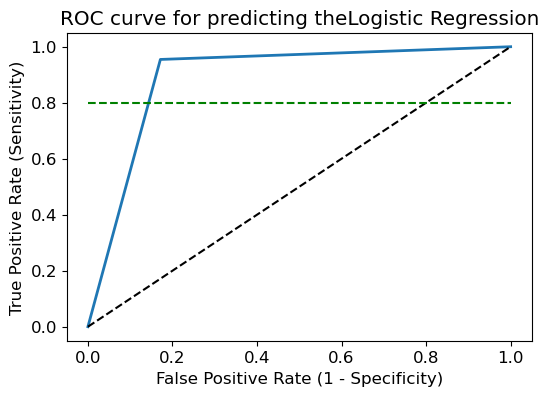

In [53]:
plot_ROCcurve()

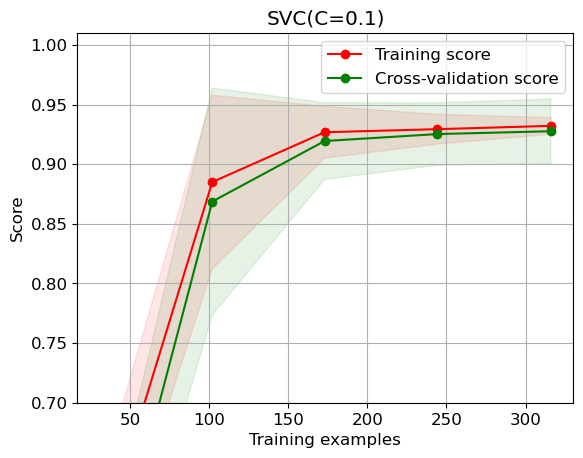

In [54]:
plot_learning_curve(model, model, X, y, (0.7, 1.01), cv=cv, n_jobs=4),
plt.show()

In [55]:
print('ROC AUC : {:.4f}'.format(auc))

ROC AUC : 0.8916


### AdaBoost

In [56]:
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
auc = ada_auc = roc_auc_score(y_test, prediction)
print('ROC AUC : {:.4f}'.format(auc))
print(classification_report(y_test,prediction))

ROC AUC : 0.9201
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        35
           1       0.91      0.95      0.93        44

    accuracy                           0.92        79
   macro avg       0.93      0.92      0.92        79
weighted avg       0.92      0.92      0.92        79



ROC AUC : 0.9201


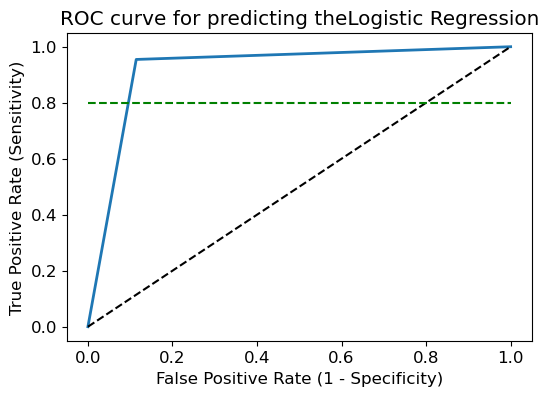

In [57]:
plot_ROCcurve()

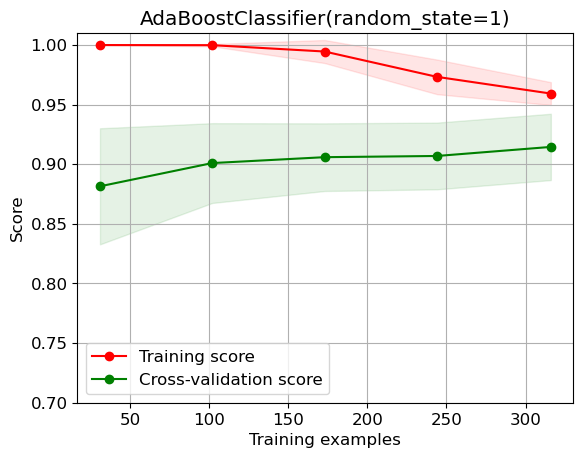

In [58]:
plot_learning_curve(model, model, X, y, (0.7, 1.01), cv=cv, n_jobs=4),
plt.show()

In [59]:
print('ROC AUC : {:.4f}'.format(auc))

ROC AUC : 0.9201


### K Nearest Neighbors Classifier (KNN)

In [60]:
model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
auc = knn_auc = roc_auc_score(y_test, prediction)
print('ROC AUC : {:.4f}'.format(auc))
print(classification_report(y_test,prediction))

ROC AUC : 0.9029
              precision    recall  f1-score   support

           0       0.97      0.83      0.89        35
           1       0.88      0.98      0.92        44

    accuracy                           0.91        79
   macro avg       0.92      0.90      0.91        79
weighted avg       0.92      0.91      0.91        79



ROC AUC : 0.9029


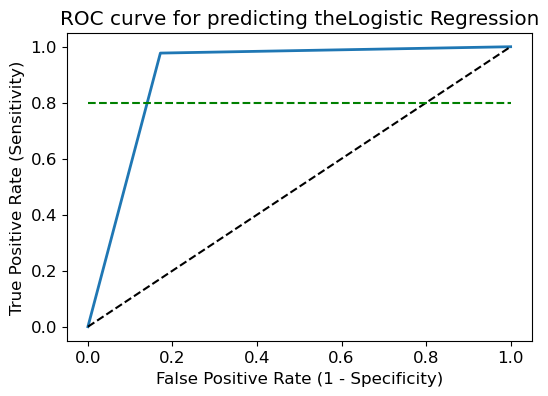

In [61]:
plot_ROCcurve()

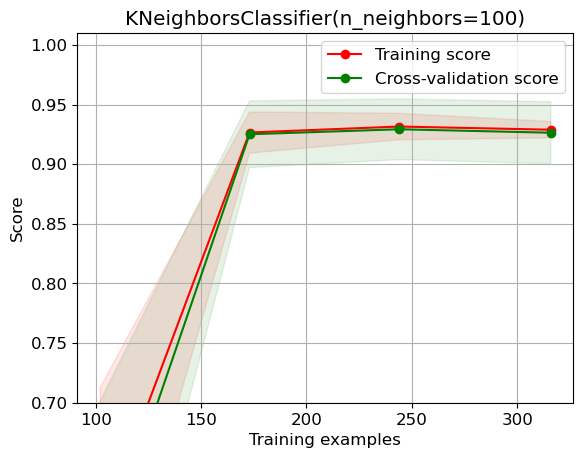

In [62]:
plot_learning_curve(model, model, X, y, (0.7, 1.01), cv=cv, n_jobs=4),
plt.show()

In [63]:
print('ROC AUC : {:.4f}'.format(auc))

ROC AUC : 0.9029


<h1> 7. Model Training Summary

In [64]:
prediction_data={'Model':['Logistic Regression',
                          'Logistic Regression with crossvalidation',
                          'Decision Tree Classifier',
                          'Random Forest Classifier',
                          'KNN',
                          'SVC',
                          'AdaBoost'
                         ],
                    'ROC AUC':[lr_auc,
                               lrCV_auc,
                               dt_auc, 
                               rf_auc,
                               svc_auc,
                               ada_auc,
                               knn_auc,
                              ]
                    }
 
# Create DataFrame
prediction_table = pd.DataFrame(prediction_data)
prediction_table.sort_values(by = ['ROC AUC'], ascending=False)

,Model,ROC AUC
1,Logistic Regression with crossvalidation,0.953896
0,Logistic Regression,0.951948
5,SVC,0.920130
2,Decision Tree Classifier,0.908766
6,AdaBoost,0.902922
3,Random Forest Classifier,0.897403
4,KNN,0.891558


## Conclusions

The best models to predict whether a student will pass the exam or not are cross-validated logistic regression and logistic regression. Both models have a ROC AUC score of just over 0.95